# Assignment 5

Welcome to the assignment for week 5.

## Task 5: Optical Flow

### Task 5.1: Block Matching

* Implement the block matching method as shown in the lecture
* Take two frames from the datasets "lane_detection" or "copter_flight" with variable distances in time (1, 2, x) and compute the vector flow field
* Display a subset of flow vectors on the gray-value version of the first image, by drawing a respective line. adjust the grid density such that not too many vectors overlap (**RESULT**)

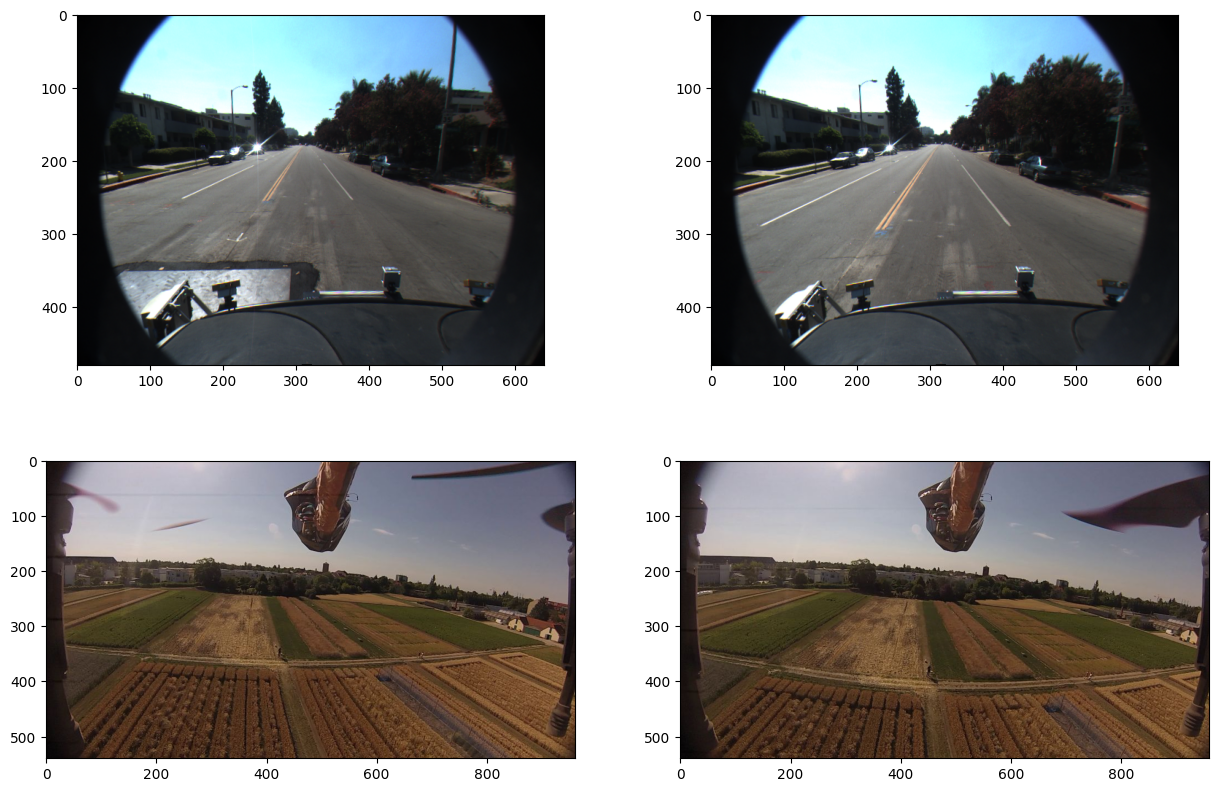

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
import matplotlib.patches as patches

# Chose other images if you like
lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00001.png')

copter1 = io.imread('images/copter_flight/frame050.jpg')
copter2 = io.imread('images/copter_flight/frame052.jpg')


fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax21 = plt.subplot(2, 2, 3)
ax22 = plt.subplot(2, 2, 4)

ax11.imshow(lane1)
ax12.imshow(lane2)

ax21.imshow(copter1)
ax22.imshow(copter2)

In [3]:
# code here

### Task 5.2: Harris Corner Detection

* Implement the Harris Corner Detector as discussed in the lecture
* Compute and Plot the Harris Corners for the the two images given at the top of this assignment (**RESULT**)

In [ ]:
from scipy import ndimage
import cv2
import numpy as np

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def harris_corner_detection(img, k=0.03, threshold=0.01):
    gray=color.rgb2gray(img)

    Ix = ndimage.filters.convolve(gray, sobel_x)
    Iy = ndimage.filters.convolve(gray, sobel_y)
    
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy
    
    Sxx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
    Syy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
    Sxy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

    det_H = (Sxx * Syy) - (Sxy ** 2)
    trace_H = Sxx + Syy
    R = det_H - k * (trace_H ** 2)

    R_max = np.max(R)
    corners = np.zeros_like(R)
    corners[R > threshold * R_max] = 255
    
    # you can shrink them as you like
    dilated = cv2.dilate(R, None)
    cleaned = cv2.erode(dilated, None)
    corners = np.uint8(R == cleaned) * corners
    
    image_with_corners = np.copy(img)
    image_with_corners[corners > 0] = [255, 0, 0]

    return image_with_corners

/tmp/ipykernel_5042/2345575537.py:11: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Ix = ndimage.filters.convolve(gray, sobel_x)
/tmp/ipykernel_5042/2345575537.py:12: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Iy = ndimage.filters.convolve(gray, sobel_y)


(480, 640, 3) (480, 640)
(480, 640, 3) (480, 640)
(540, 960, 3) (540, 960)
(540, 960, 3) (540, 960)


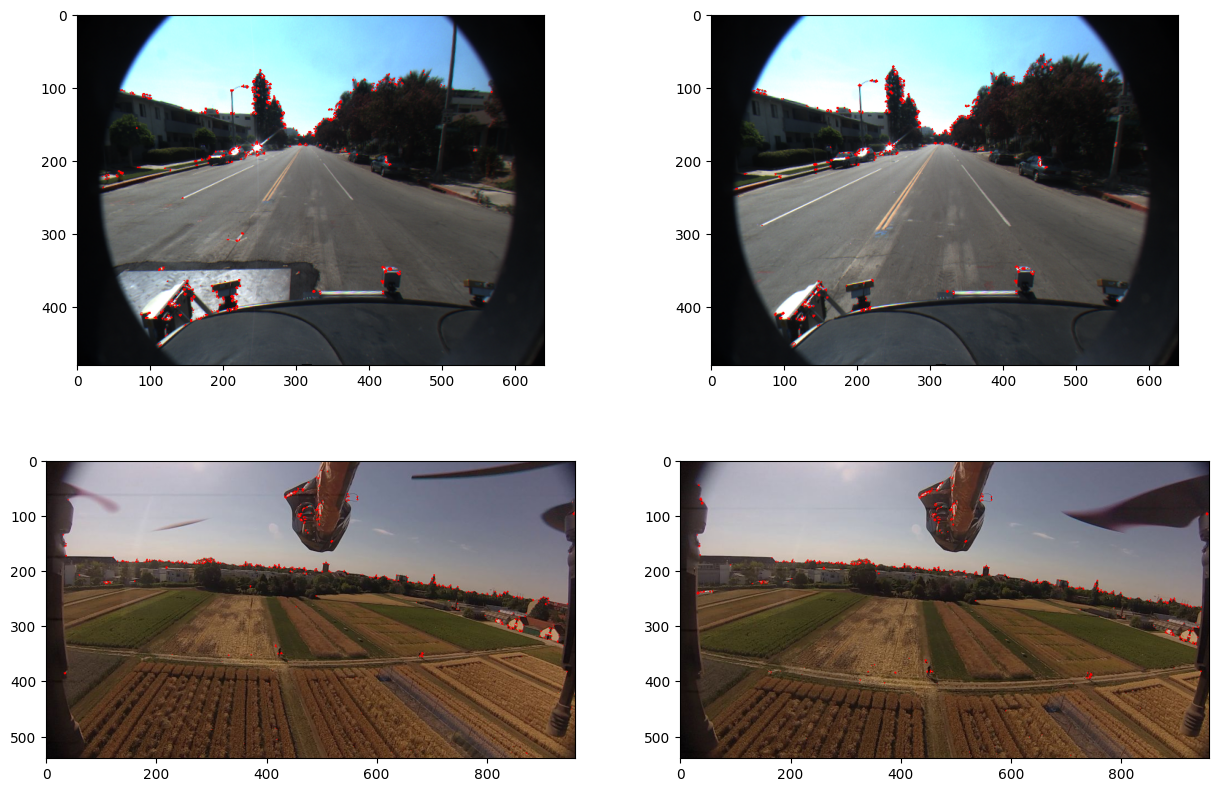

In [31]:
fig, axs = plt.subplots(2,2, figsize=(15, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, pic in enumerate([lane1, lane2, copter1, copter2]):
    pic_with_corners = harris_corner_detection(pic)
    axs[i].imshow(pic_with_corners)

### Task 5.3: Lucas Kanade

* For the corner images from Task 5.2, track them with Lucas Kanade (feel free to use e.g. the function "calcOpticalFlowPyrLK" in OpenCV)
* Mark the positions of your Harris Corners and draw the flow vectors found by Lucas-Kanade on the gray-value versions of the two images given in the beginning of this assignment (**RESULT**)


In [ ]:
# code here

## Congratz, you made it! :)